# Exploratory data analysis

By: Sherif Abdulkader Tawfik Abbas
- https://scholar.google.com/citations?user=NhT7vZIAAAAJ
- https://www.linkedin.com/in/sheriftawfik/

Topics we will cover:
- Introduction to data engineering
- Number cruncher: the `numpy` library
  - `numpy` arrays
  - Array operations
  - `numpy` mathematical functions
- Data work horse: `pandas`
  - The `pandas` `DataFrame` object
  - Loading and saving CSV files
- Text manipulation in python



In [3]:
# !pip3 install pymatgen xgboost sklearn pandas

from sklearn.cluster import KMeans
import matplotlib as mpl
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from pickle import dump
from xgboost import XGBClassifier, plot_importance
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import os
import warnings
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, roc_auc_score
import joblib
import importlib
import json
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import average_precision_score, precision_score
import seaborn as sns
plt.clf()
plt.style.use('bmh')

folder = 'band_gaps'
# folder = 'formation_energy_per_atom'
# full_dataset_df = pd.read_csv('/mnt/c/MyResearch/MachineLearning/ML/ML_DScribe/ewald_dataset_e.csv', index_col='material_id')
df = pd.read_csv('../Data/ucs_satellite_database_7_1_16.csv')
df.head()


,name_of_satellite_alternate_names,country_org_of_un_registry,country_of_operator_owner,operator_owner,users,purpose,detailed_purpose,class_of_orbit,type_of_orbit,longitude_of_geo_degrees,...,norad_number,comments,column_ab,source_used_for_orbital_data,source,source_2,source_3,source_4,source_5,source_6
0,AAUSat-4,NR (6/16),Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,41460.0,Carries AIS system.,NaN,Space50,http://spaceflightnow.com/2016/04/26/soyuz-bla...,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN,NaN,NaN,NaN
1,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,39508.0,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",NaN,ZARYA,http://www.absatellite.net/satellite-fleet/?sa...,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...,http://www.spacenews.com/article/satellite-tel...,NaN,NaN
2,ABS-2A,NR (6/16),Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.00,...,41588.0,NaN,NaN,Estimated,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,...,24901.0,Most powerful telecommunications satellite in ...,NaN,JM/12_08,http://www.mabuhaysat.com/sat&net.html,http://nssdc.gsfc.nasa.gov/spacewarn/spx526.html,http://www.absatellite.net/about/index.html,http://perso.wanadoo.fr/eurospace/espdatabase/...,NaN,NaN
4,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,...,40424.0,Coverage of Americas Europe and Africa.,NaN,NaN,http://www.absatellite.net/satellite-fleet/?sa...,http://spaceflightnow.com/2015/03/17/innovativ...,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name_of_satellite_alternate_names  1420 non-null   object 
 1   country_org_of_un_registry         1420 non-null   object 
 2   country_of_operator_owner          1420 non-null   object 
 3   operator_owner                     1419 non-null   object 
 4   users                              1419 non-null   object 
 5   purpose                            1419 non-null   object 
 6   detailed_purpose                   369 non-null    object 
 7   class_of_orbit                     1419 non-null   object 
 8   type_of_orbit                      899 non-null    object 
 9   longitude_of_geo_degrees           1402 non-null   float64
 10  perigee_km                         1419 non-null   float64
 11  apogee_km                          1419 non-null   float

In [8]:
df.columns

Index(['name_of_satellite_alternate_names', 'country_org_of_un_registry',
       'country_of_operator_owner', 'operator_owner', 'users', 'purpose',
       'detailed_purpose', 'class_of_orbit', 'type_of_orbit',
       'longitude_of_geo_degrees', 'perigee_km', 'apogee_km', 'eccentricity',
       'inclination_degrees', 'period_minutes', 'launch_mass_kg',
       'dry_mass_kg', 'power_watts', 'date_of_launch', 'expected_lifetime',
       'contractor', 'country_of_contractor', 'launch_site', 'launch_vehicle',
       'cospar_number', 'norad_number', 'comments', 'column_ab',
       'source_used_for_orbital_data', 'source', 'source_2', 'source_3',
       'source_4', 'source_5', 'source_6'],
      dtype='object')

In [9]:
df.describe()

,longitude_of_geo_degrees,perigee_km,apogee_km,eccentricity,inclination_degrees,launch_mass_kg,norad_number
count,1402.000000,1419.000000,1419.000000,1419.000000,1419.000000,1317.000000,1419.000000
mean,5.786598,14604.973221,16532.527837,0.020816,50.278703,2007.517373,34574.525722
std,53.973571,16550.261760,22155.693096,0.112774,41.841954,2227.397965,6087.083306
min,-177.120000,200.000000,322.000000,0.000000,0.000000,0.000000,7530.000000
25%,0.000000,621.000000,687.000000,0.000210,0.090000,172.000000,28377.000000
50%,0.000000,1357.000000,1415.000000,0.000534,54.970000,1200.000000,37234.000000
75%,0.000000,35770.000000,35795.000000,0.001576,97.460000,3379.000000,40022.000000
max,328.500000,62200.000000,330000.000000,0.957119,143.400000,18000.000000,41634.000000


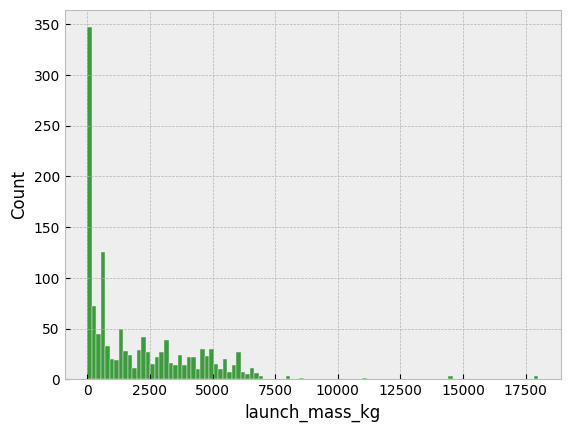

In [15]:
sns.histplot(df['launch_mass_kg'], color='g', bins=100,kde_kws={'alpha': 0.4})
plt.savefig('launch_mass_kg_histogram')

Masses of satellites launched by USA contractors:

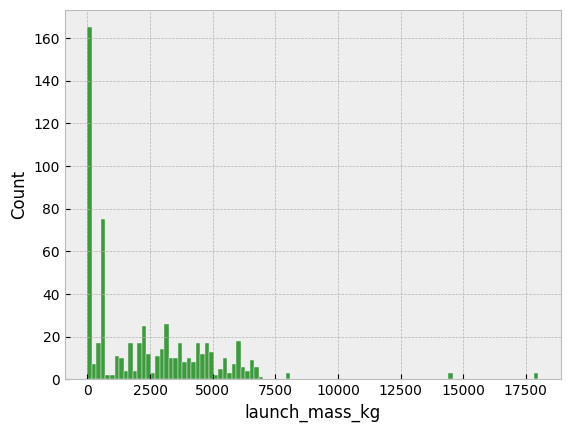

In [16]:
df_usa = df.loc[df['country_of_contractor']=='USA']
sns.histplot(df_usa['launch_mass_kg'], color='g', bins=100,kde_kws={'alpha': 0.4})
plt.savefig('launch_mass_kg_usa_histogram')

Possible values for the expected lifetimes:

In [17]:
df['expected_lifetime'].unique()

array([nan, '15 yrs.', '12 yrs.', '14 yrs.', '2 yrs.', '3 yrs.', '5 yrs.',
       '15+ yrs.', '10 yrs.', '14yrs.', '1 yr.', '8 yrs.', '7 yrs.',
       '1.5 yrs.', '13 yrs.', '6 yrs.', '.5 yrs.', '7-9 yrs.', '18 yrs.',
       '5+ yrs.', '16 yrs.', '7-10 yrs.', '.25 yrs.', '11 yrs.',
       '13 trs,', '5-8 yrs.', '7+ yrs.', '15  yrs.', '5-7 yrs.',
       '3-5 yrs.', '9-12 yrs.', '8+ yrs.', '17 yrs.', '15-18 yrs.',
       '20 yrs.', '10-15 yrs.', '30+ yrs.', '14.5 yrs.', '7.25 yrs.',
       ' 3 yrs.', '4 yrs.', '9 yrs.', '2-3 yrs.', '11.5 yrs.', '12 hrs.',
       '10-12 yrs.', '10-14 yrs.', '2.5 yrs.', '3+ yrs.', '12.6 yrs.',
       '2-4 yrs.', '.25-1 yr.', '2-10 yrs.'], dtype=object)